In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from IPython import display
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd

# Introduction
- In previous sections, we go through the theoretical and applicational aspects of several <b>classification/regression</b> models.
- In this section, we are going to discuss: 
    1. various <b>metrics to evaluate a modal performance</b> in classification and regression, and 
    2. how to <b>utilize the dataset for model validation</b>

# Evaluation Metrics for Classification

## Accuracy
- The simplest/most intuitive metric
$$ \text{Accuracy} = \frac{\text{Number of correct predictions}}{\text{Total number of predictions}} $$

In [2]:
from sklearn.metrics import accuracy_score
y_pred = [0, 2, 1, 3]
y_true = [0, 1, 2, 3]
print(accuracy_score(y_true, y_pred))    # range from 0 to 1
print(accuracy_score(y_true, y_pred, normalize=False))    # count the no. of correct predictions

0.5
2


## Precision, Recall and F1 Score
- Let's start with binary classification with class 0 (negative) and 1 (positive) only, one can classify the prediction into <b>four types</b> and put them in a <b>confusion matrix</b>:

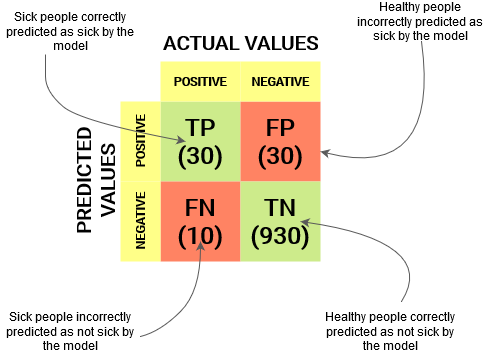

In [3]:
# confusion matrix format
display.Image('img/5_confusion_matrix.png', width=500)

<b>True/False describes whether a prediction is correct, while positive/negative describes a prediction result.</b>
- True Positive (TP): The prediction is positive and this prediction is true.
- False Positive (FP): The prediciton is positive and this prediction is false, also called <b>type I error</b>.
- False Negative (FN): The prediction is negative and the prediction is false, also called <b>type II error</b>.
- True Negative (TN): The prediction is negative and the prediction is true.
<br>
One reason why we distinguish two types of false predictions is that we tend to emphasis on either one according to real situations, for examples
1. For <b>medical test</b> like COVID screening test, we want to stress on minimizing FN rate as false negative could lead to further spreading of virus in the community. One the other hand FP could lead to a second test or unnecessary treatment.
2. For <b>video recommendation</b> FP is much more of concern as higher FN only leads to less recommendations but a company is more likely to ensure the recommendations are right.

- So now we can rewrite the formula of accuracy as <br>$$\text{Accuracy} = \frac{TP+TN}{TP+FP+FN+TN}$$</br>
- We can also defines precision as <br>$$\text{Precision} = \frac{TP}{TP+FP}$$<br> which measures <b>how precise a model can tell the difference between positive and negative</b>. A higher precision means a lower false positive rate.
- Define recall/sensitivity as <br>$$\text{Recall} = \frac{TP}{TP+FN}$$<br> which measures <b>how sensitive a model reacts to positive samples</b>. A higher recall means a lower false negative rate.<br><br>

In previous two examples, for medical test one <b>prefers high recall to spot as mucn positive cases as possible (as for false positive cases one could do more tests to eliminate later)</b>. For video recommendation one <b>prefers high precision to show most suggestions correctly</b> but missing some relevant videos is difficult for users to notice.

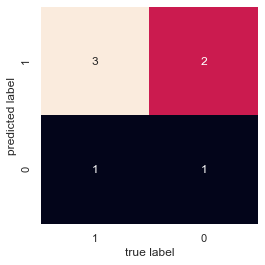

In [4]:
# confusion matrix for binary classification by sklearn and seaborn
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y_true, y_pred, labels):
    mat = confusion_matrix(y_true, y_pred, labels=labels)    # Cij = no. of observations belongs to class i predicted to class j
    sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, 
                xticklabels=labels, yticklabels=labels)    # transpose to put true label to x-axis
    plt.xlabel('true label')
    plt.ylabel('predicted label');
    
y_true = [1, 1, 1, 1, 0, 0, 0]
y_pred = [1, 1, 0, 1, 1, 1, 0]
labels=[1, 0]
plot_confusion_matrix(y_true, y_pred, labels=[1, 0])

In [5]:
# precision and recall by sklearn
from sklearn.metrics import precision_score, recall_score
print(f'precision = {precision_score(y_true, y_pred)}')    # 3/(3+2), default pos_label=1
print(f'recall = {recall_score(y_true, y_pred)}')    # 3/(3+1)

precision = 0.6
recall = 0.75


Ideally, one wants both high precision and high recall. In a balanced dataset, a high accuracy implies good precision and recall. In <b>imbalanced dataset</b>, however, the case may not be true.

acc = 0.92
precision = 1.0
recall = 0.2


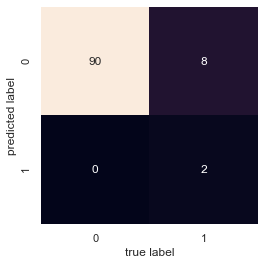

In [6]:
# imbalanced dataset with 90% negative and 10% positive
# assume the models classify negative well but positive badly
y_true = np.concatenate((np.zeros(90), np.ones(10)))
y_pred = np.concatenate((np.zeros(98), np.ones(2)))
labels = [0, 1]
plot_confusion_matrix(y_true, y_pred, labels)
print(f'acc = {accuracy_score(y_true, y_pred)}') 
print(f'precision = {precision_score(y_true, y_pred)}') 
print(f'recall = {recall_score(y_true, y_pred)}')
# acc is high but recall is low, the model is not sensitive to positive data at all

To tackle with the imbalanced situation, one can use <b>$F_1$ score</b>, which is the (harmonic) mean of precision and recall: <br><br>
<b>$$ F_1 = \frac{2}{\frac{1}{\text{recall}}+\frac{1}{\text{precision}}}
=2\cdot \frac{\text{recall}\times \text{precision}}{\text{recall}+\text{precision}}$$ 

In [7]:
# f1 is low indicating the average of precision and recall is low
from sklearn.metrics import f1_score
f1_score(y_true, y_pred)

0.33333333333333337

Harmonic mean $\frac{2}{\frac{1}{a}+\frac{1}{b}}$ has the nature that it tends towards the least of the two numbers (if $a$ is extremely small then $\frac{1}{a}$ will be very large), maximizing impact of the lower score, 

$$ (1+\beta^{2})\cdot \frac{\text{precision}\times \text{recall}}{\beta^{2} \cdot\text{precision}+\text{recall}} $$
                            

## F-measure (Optional) 
- $F_1$ score belongs to a more generic class of measures named $F$-score/$F$-measure/$F_\beta$ score.
- Recall that $F_1 = 2\cdot \frac{\text{recall}\times \text{precision}}{\text{recall}+\text{precision}}$, where precision and recall are weighed equally. On the other hand, the generic $F_\beta$ score is defined as: <br>
$$\begin{equation}
      \begin{aligned} 
    F_\beta & = \frac{1}{\frac{1}{\beta^{2}+1}\frac{1}{\text{precision}} +\frac{\beta^{2}}{\beta^{2}+1}\frac{1}{\text{recall}}}\\
            & = (1+\beta^{2})\cdot \frac{\text{precision}\times \text{recall}}{\beta^{2} \cdot\text{precision}+\text{recall}}
      \end{aligned}
    \end{equation}
$$<br>
- When $\beta > 1$, the score weighs recall higher than precision, when $\beta < 1$, the score weighs recall lower than precision. 
- Two usually used $\beta$ values are 2 are 0.5.
- The reason to have $F_\beta$ is that, <b>sometimes the importances of precision and recall should not be regarded as equal</b>, e.g. classifying a sick person as healthy has a different cost from classifying a healthy person as sick.

In [8]:
from sklearn.metrics import fbeta_score
print(f'precision = {precision_score(y_true, y_pred)}') 
print(f'recall = {recall_score(y_true, y_pred)}')
print(f'F_2 score (favours recall) = {fbeta_score(y_true, y_pred, beta=2):.2f}')
print(f'F_0.5 score (favours precision) = {fbeta_score(y_true, y_pred, beta=0.5):.2f}')

precision = 1.0
recall = 0.2
F_2 score (favours recall) = 0.24
F_0.5 score (favours precision) = 0.56


# Evaluation Metrics for Regression
- Unlike in classification that we used different ways to 'count' the number of right and wrong predications, in regression one have to measure how the extent of deviation of each target value and predicted value.

## Mean Absolute Error (MAE) / L1 Loss 
- The mean of sum of absolute differences between each pair of true and predicted value
    $$\text{MAE}(y,\hat{y})=\frac{1}{n}\sum_{i=1}^{N}\vert y_i-\hat{y_i} \vert$$

In [9]:
from sklearn.metrics import mean_absolute_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
mean_absolute_error(y_true, y_pred)

0.5

## Mean Squared Error (MSE) / L2 Loss
- The mean of sum of squared differences each pair of true and predicted value
    $$\text{MSE}(y,\hat{y})=\frac{1}{n}\sum_{i=1}^{N}(y_i-\hat{y_i})^2$$

In [10]:
from sklearn.metrics import mean_squared_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
mean_squared_error(y_true, y_pred)

0.375

Simply speaking <b>MSE penalizes more on large errors/outliers and penalizes less on small errors compared with MAE</b>.

## The Coefficient of Determination / R2 Score
- (Introduced in Sec 2.1) It measures the proportion of variance between true values and predicted values to variance between true values and the true mean. It shows relative goodness of a model fit. The best value is 1, the larger the better.
    $$R^2=1-\frac{\sum_{i=1}^{n}(y_i-\hat{y_i})^2}{\sum_{i=1}^{n}(y_i-\bar{y_i})^2}$$

In [11]:
from sklearn.metrics import r2_score
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
r2_score(y_true, y_pred)

0.9486081370449679

# Training and Testing
- The simple idea is to leave a portion of data (<b>holdout set</b>) out from training process and use it to test the trained model.
- It is because if one use the training data learnt by the model for validation, since the model has already 'seen' the data, it is easy for the model to perform well on the same data.
- There are numerous techniques for modal validation, we will go through several popular ones.

## Train-Test Split

In [12]:
# let's use iris dataset as an example
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [13]:
# kNN classifier
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)

In [14]:
# the wrong way
from sklearn.metrics import accuracy_score
model.fit(X, y)
y_pred = model.predict(X)
accuracy_score(y, y_pred)

1.0

In [15]:
# a better way
# use train_test_split to leave out 70% of data for testing, and measure the accuarcy of model on test data
from sklearn.model_selection import train_test_split

# split the data with 50% in each set
# by default, shuffle=True will shuffle the data before splitting
# stratify = y ensures a close to equal proportion of y values in both train and test sets, useful if dataset is imbalanced
X1, X2, y1, y2 = train_test_split(X, y, random_state=0, train_size=0.7, stratify=y)

# fit the model on one set of data
model.fit(X1, y1)

# evaluate the model on the second set of data
y2_model = model.predict(X2)
accuracy_score(y2, y2_model)

0.9777777777777777

## K-Fold Cross-Validation
- The above train-test split is a bit better than no split one, but still not very ideal because it cannot assure consistency of a model on the whole dataset: <b>it is possible that the model performs exceptionally well on one test set but not another</b> if chosen differently. <br><br>
- To utilize all data in a dataset for model selection, a <b>k-fold cross-validation</b> is applied. It generally involves the following steps:
<ol>
    <li><b>Shuffle</b> the dataset</li>
    <li><b>Split</b> the dataset evenly into k groups</li>
    <li>For each group, take the group as a test set, while all other groups together as a train set, use a metric to measure the performance for each test result. This gives us <b>a total number of k tests</b>.</li>
    <li>Summarise model performances of the k tests (e.g. mean)</li>
</ol>

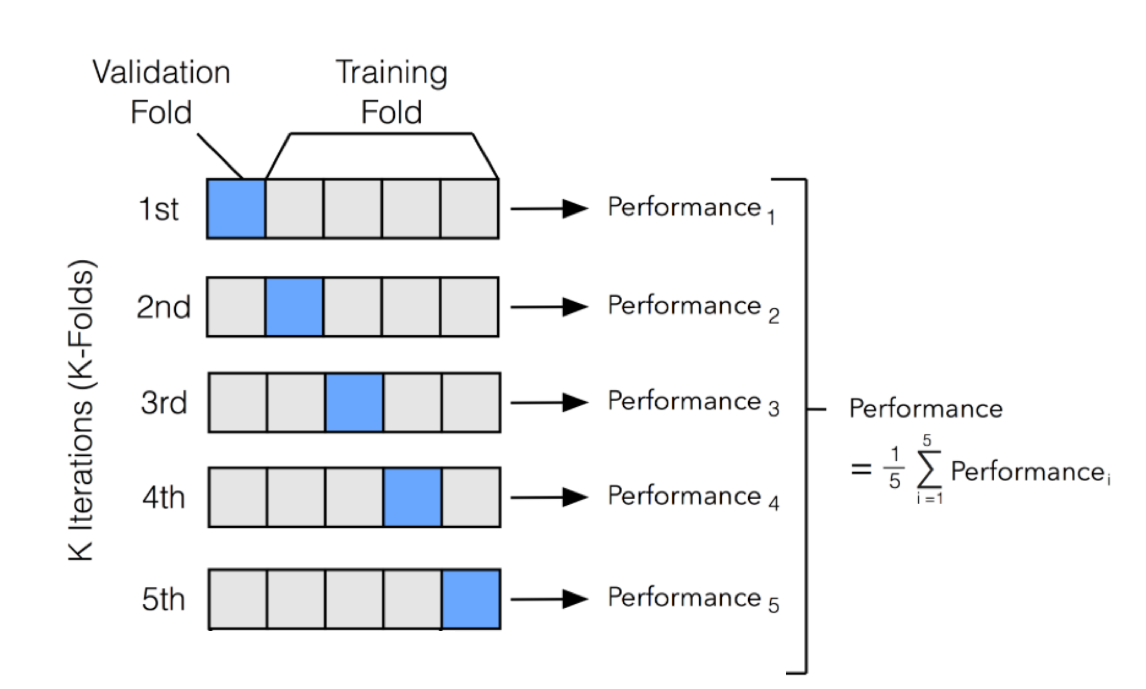

In [16]:
display.Image('img/5_k_fold_cv.png', width=600)

There are two functions in sklearn, namely <b>cross_val_score</b> and <b>cross_validate</b> for cross-validation. The former one only returns k test scores while the latter one can <b>return fit-times, score-times and work on multiple metrics</b>.

In [17]:
# 5-fold cv with cross_val_score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5)    # default use stratified k-fold if cv=integer
scores

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

In [18]:
# how we interpret the scores
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.96 accuracy with a standard deviation of 0.02


In [19]:
# 5-fold cv with cross_validate, more details
# accepts multiple scoring methods
from sklearn.model_selection import cross_validate
cross_validate(model, X, y, cv=5, scoring=('accuracy', 'f1_macro'), return_train_score=True) 

{'fit_time': array([0.0009954 , 0.        , 0.00100255, 0.        , 0.00099969]),
 'score_time': array([0.00300431, 0.00301003, 0.00199389, 0.00200009, 0.00099969]),
 'test_accuracy': array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ]),
 'train_accuracy': array([1., 1., 1., 1., 1.]),
 'test_f1_macro': array([0.96658312, 0.96658312, 0.93265993, 0.93333333, 1.        ]),
 'train_f1_macro': array([1., 1., 1., 1., 1.])}

Different scoring parameters can be found at: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

There are three F1 scores for multiclass classification in sklearn, namely <b>f1_macro, f1_micro and f1_weighted</b>.
- <b>f1_macro</b>: compute f1 score for each label and take the average
- <b>f1_weighted</b>: compute f1 score for each label and take the weighted average according to the sample size of each label
- <b>f1_micro</b>: compute f1 score by considering total true positives, false positives and false negatives, in this case <b>micro-f1 = micro-precision = micro-recall = accuracy</b>

A calculation example can be found at: 
https://towardsdatascience.com/multi-class-metrics-made-simple-part-ii-the-f1-score-ebe8b2c2ca1

- In short, if one wants to look at the classification of all labels as a whole (like looking at the overall accuracy), use f1_micro. Otherwise use f1_macro or f1_weighted to get an idea of how on average the model performs on each label. 

## Leave-One-Out Cross Validation (LOOCV)
- When the dataset (size $N$) is small or one prefer a precise estimation of model performance, one could use leave-one-out cross validation, which performs $N$ tests using $N-1$ training data but 1 testing data for each test.
- The <b>computation cost is much higher</b> than k-fold cv.

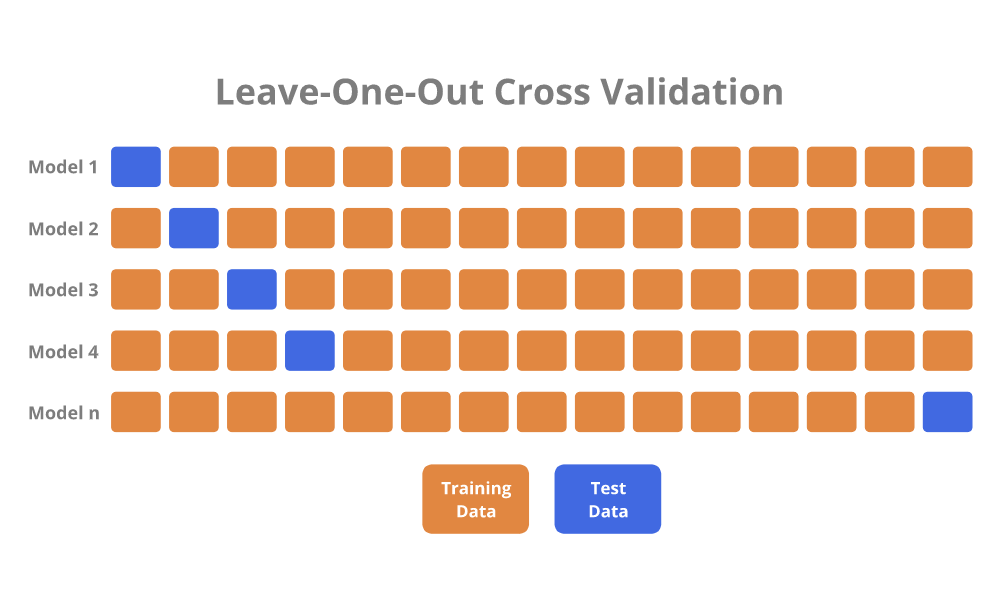

In [20]:
display.Image('img/5_loocv.png', width=500)

In [21]:
# loocv with sklearn
from sklearn.model_selection import LeaveOneOut
scores = cross_val_score(model, X, y, cv=LeaveOneOut())
print(scores)
print(len(scores))
# the score for each test is either 0 or 1

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
150


In [22]:
# or one can use LeavePOut, which choose p samples out of N as test set
# total no. of tests = pCN
from sklearn.model_selection import LeavePOut
scores = cross_val_score(model, X, y, cv=LeavePOut(2))
print(scores)
print(len(scores))
# 2C15=11175

[1. 1. 1. ... 1. 1. 1.]
11175
